In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

np.random.seed(42)


In [3]:
wine = load_wine()
X = wine.data
y = wine.target

print("Dataset shape:", X.shape)
print("Dataset shape:", y.shape)
print("Classes:", list(wine.target_names))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

Dataset shape: (178, 13)
Dataset shape: (178,)
Classes: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# Baseline KNN model (Euclidean distance via Minkowski p=2)
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=15, metric="minkowski", p=2))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1])

In [7]:
print("Accuracy:", float(accuracy_score(y_test, y_pred)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))

Accuracy: 1.0

Confusion Matrix:
 [[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Key KNN parameters one must know

- `n_neighbors` (K): number of neighbors consulted  
- `metric`: how distance is computed  
- `p` (for Minkowski):  
  - p = 2 means Euclidean  
  - p = 1 means Manhattan  
- `weights`:  
  - `uniform`: all neighbors vote equally  
  - `distance`: closer neighbors vote more 
  

In [9]:
#We will tune K by trying a range of values and plotting accuracy.
k_values = range(1,42)
accs = []

for k in k_values:
  model = Pipeline([
      ("scaler", StandardScaler()),
      ("knn", KNeighborsClassifier(n_neighbors=k))
  ])
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accs.append(accuracy_score(y_test, pred))

  print(accs)

[0.9555555555555556]
[0.9555555555555556, 0.9333333333333333]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9777777777777777]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9777777777777777, 0.9555555555555556]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777]
[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.93333333

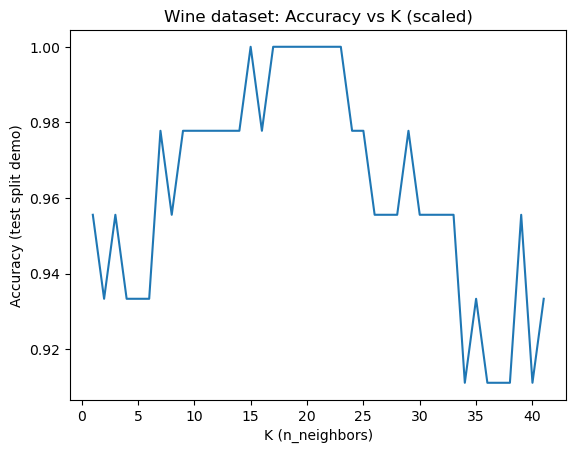

Best K (by this demo): 15
Best accuracy: 1.0


In [10]:
plt.figure()
plt.plot(list(k_values), accs)
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy (test split demo)")
plt.title("Wine dataset: Accuracy vs K (scaled)")
plt.show()

best_k = list(k_values)[int(np.argmax(accs))]
print("Best K (by this demo):", best_k)
print("Best accuracy:", float(np.max(accs)))

## Compare distance metrics and voting weights

We compare:
- Euclidean distance (p=2)
- Manhattan distance (p=1)
- Euclidean with distance-weighted voting

Goal: Show that KNN is not “one model”. Its behavior depends on your choices.


In [11]:
#Compare distance metrics and voting weights
k_demo = best_k

settings = [
    ("Euclidean (p=2), uniform", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski",p=2,weights="uniform")),
    ("Manhattan (p=1), uniform", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski",p=1,weights="uniform")),
    ("Euclidean (p=2), distance", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski",p=2,weights="distance")),
]

rows = []
for name,knn in settings:
  model = Pipeline([("scaler", StandardScaler()), ("knn",knn)])
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  rows.append([name, accuracy_score(y_test,pred)])

pd.DataFrame(rows, columns=["Setting", "Accuracy"]).sort_values("Accuracy", ascending=False)

,Setting,Accuracy
0,"Euclidean (p=2), uniform",1.000000
2,"Euclidean (p=2), distance",1.000000
1,"Manhattan (p=1), uniform",0.977778


In [12]:
# KNN without scaling (intentionally)
knn_no_scale = KNeighborsClassifier(n_neighbors=best_k)
knn_no_scale.fit(X_train, y_train)
pred_no_scale = knn_no_scale.predict(X_test)

acc_no_scale = accuracy_score(y_test, pred_no_scale)

# KNN with scaling (pipeline)
pred_scaled = clf.predict(X_test)
acc_scaled = accuracy_score(y_test, pred_scaled)

print("Accuracy without scaling:", float(acc_no_scale))
print("Accuracy with scaling:", float(acc_scaled))

Accuracy without scaling: 0.7777777777777778
Accuracy with scaling: 1.0
